# IMPORTS

In [37]:
import json
import numpy as np 
import pandas as pd 
from json.decoder import JSONDecodeError
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# DOWNLOADING DATA

In [38]:
data=pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv")
features_to_drop=["budget","homepage","popularity","release_date","revenue","runtime","vote_average","vote_count","id"]
df=data.drop(columns=features_to_drop)
tfidf=TfidfVectorizer()

# TEXT_PROCESSING

In [39]:
def genres_to_string(df):
    for i in range(df.shape[0]):
        try:
            genres_str = df["genres"][i]
            dict_list = json.loads(genres_str)
            genre_string = " ".join([dictionary["name"] for dictionary in dict_list])
            df.at[i, "genres"] = genre_string
        except JSONDecodeError as e:
            print(f"Error decoding JSON in row {i}: {e}")

def company_to_string(df):
    for i in range(df.shape[0]):
        try:
            genres_str = df["production_companies"][i]
            dict_list = json.loads(genres_str)
            genre_string = " ".join([dictionary["name"] for dictionary in dict_list])
            df.at[i, "production_companies"] = genre_string
        except JSONDecodeError as e:
            print(f"Error decoding JSON in row {i}: {e}")
def spoken_languages(df):
    for i in range(df.shape[0]):
        try:
            genres_str = df["spoken_languages"][i]
            dict_list = json.loads(genres_str)
            genre_string = " ".join([dictionary["name"] for dictionary in dict_list])
            df.at[i, "spoken_languages"] = genre_string
        except JSONDecodeError as e:
            print(f"Error decoding JSON in row {i}: {e}")
def replace_to_string(df):
    for i in range(df.shape[0]):
        try:
            keyword_str=df["keywords"][i]
            dict_list=json.loads(keyword_str)
            keywords_string=" ".join([dictionary["name"] for dictionary in dict_list]  )
            df.at[i,"keywords"]=keywords_string
        except JSONDecodeError as e:
            print(f"Error decoding JSON in row {i}: {e}")
    
def countries_to_string(df):
    for i in range(df.shape[0]):
        try:
            country_str=df["production_countries"][i]
            dict_list=json.loads(country_str)
            country_name=" ".join([dictionary["name"] for dictionary in dict_list])
            df.at[i,"production_countries"]=country_name
        except JSONDecodeError as e:
            print(f"Error decoding JSON in row {i} : {e}")
def merge_columns_to_one(df):
    df['information']=df.drop("title",axis=1).apply(lambda row:' '.join(map(str,row)),axis=1)
    
def dataprocessing(df):
    genres_to_string(df)
    company_to_string(df)
    spoken_languages(df)
    replace_to_string(df)
    countries_to_string(df)
    merge_columns_to_one(df)
    df.drop(df.columns.difference(["title","information"]),axis=1,inplace=True)
    
def tfidf(df):
    tfidf_dict={}
    vectorizer=tfidf.fit_transform(df["information"])
    tfidf_vector=vectorizer.toarray()
    for i in range(df.shape[0]):
        try:

            tfidf_dict[i]=tfidf_vector[i]
        except Exception as e:
            print(f"Error processing row {i}: {e}")

# FUNCTION CALL FOR TEXT_PROCESSING

In [40]:
dataprocessing(df)

In [41]:
def movieoutput(movie):
    movie_name = movie 
    serial_number = df[df['title'] == movie_name].index.tolist()
    idx=((serial_number[0]))
    movie_vector=tfidf_dict[idx]
    movie_vector=tfidf_dict[idx]
    cosine_sim_matrix=[(idx,i,cosine_similarity(movie_vector.reshape(1,-1),tfidf_dict[i].reshape(1,-1)))for i in range(len(tfidf_dict))]
    top5movies=sorted(cosine_sim_matrix,key=lambda x: x[2],reverse=True)[1:6] 
    for _,p,__ in top5movies:
            print(df["title"][p])

# USER INPUT

In [51]:
#ENter any movie from the database given and get the output of top 5 recommended movie
movie=input("Enter the movie for recommendation")
print("Here are the  recommended Movies:")
movieoutput(movie)


Enter the movie for recommendation Skyfall


Here are the  recommended Movies:
Spectre
Never Say Never Again
From Russia with Love
Dr. No
Tinker Tailor Soldier Spy


# PLOT FOR COSINE SIMILARITY

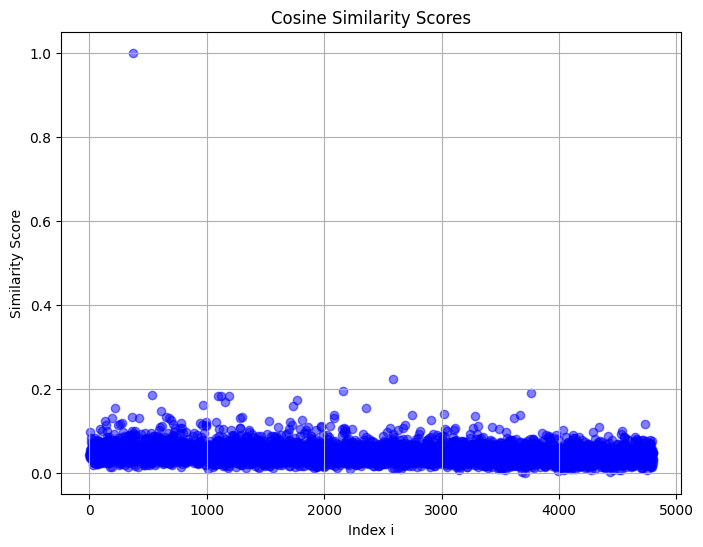

In [28]:
indices = [i for _, i, _ in cosine_sim_matrix]
scores = [score for _, _, score in cosine_sim_matrix]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(indices, scores, marker='o', color='blue', alpha=0.5)
plt.title('Cosine Similarity Scores')
plt.xlabel('Index i')
plt.ylabel('Similarity Score')
plt.grid(True)
plt.show()